In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your JSON file
file_path = '/home/newuser/Downloads/latest/q6_result.json'
sweep_file = '/home/newuser/Downloads/latest/tpch_q6_sweep.csv'
# Open and load the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

table = pd.read_csv(sweep_file,index_col=0)



In [7]:

col1_name = list(data.keys())[0]  # col1name
col2_name = list(data.keys())[1]  # col2name
col3_name = list(data.keys())[2]  # col3name

col1_values = data[col1_name]
col2_values = data[col2_name]
col3_values = data[col3_name]


In [8]:
deviation_log = data['deviation_log']
# Prepare x, y, z arrays
x = []
y = []
z = []
c = []
for log in deviation_log:
    row1_idx, row2_idx, qerror = log
    x.append(abs(col1_values[table.loc[row1_idx, 'shipdate']] - col1_values[table.loc[row2_idx, 'shipdate']]))  
    y.append(abs(col2_values[str(table.loc[row1_idx, 'discount'])] - col2_values[str(table.loc[row2_idx, 'discount'])]))  
    z.append(abs(col3_values[str(table.loc[row1_idx, 'quantity'])] - col3_values[str(table.loc[row2_idx, 'quantity'])]))
    c.append(qerror)                      # q-error

# Convert to numpy arrays
x = np.array(x)
y = np.array(y)
z = np.array(z)
c = np.array(c)




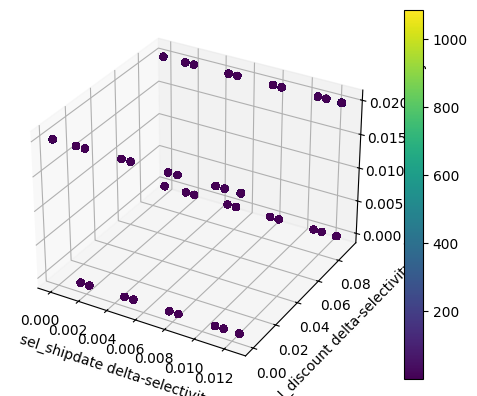

In [10]:
# Step 3: Plot 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=c, cmap='viridis', marker='o')
fig.colorbar(scatter)
ax.set_xlabel(f'{col1_name} delta-selectivity')
ax.set_ylabel(f'{col2_name} delta-selectivity')
ax.set_zlabel(f'{col3_name} delta-selectivity')

plt.show()